### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Muyuan Yang

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    You should run the file “main.py” in the terminal with the command [- - Remote] for remote use. If you have downloaded the data once, you may use[- - Local] command for local manipulate next time. To show this commands, you may use [- h] to view helps and instructions in command line. Once you use the [- - Remote], you will invoke the code, it will download TOP100 Universities in UK ’s information  and store them in the file :/data. In that file, you will find a .db document called “crimerecord.db” which contains three tables to show school ranks, coordinates and crime records from Jan. to Oct.,2019. 
(If you start with “- - Local”, it begins here) After that, the code will invoke the analysis part, it will clean, re-organize, extract the useful data from the initial database and create three new tables to save these new data. And it will generate two general statistical graphs automatically and save them in same path. Then you can find an interface, just use number to make your query under the text instructions. If your query’s result is a graph, it will be saved to the same path, too. Use number “8” to quit the program.

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The speed of data scraping is not fast enough(About 12mins) And  charts are not beautiful enough. Maybe the type of graphs should be expanded.

4.  **Anything else you feel is relevant to the grading of your project your project.**

   I design a simple but useful interface so that you can generate the graphs separately under your thoughts rather than get all the graphs at same time. In other words, you can custom your analysis in this project.



5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    I design this project to see the crime records’ distribution of UK’s famous universities. 
By analyzing the crime records of each university, I may define whether a British university is safe or not. And I also can show what are top crime types for a school. At the same time, I  do some research about the ‘crime’ itself. For instance, I gave the distribution graph of crime records by schools and month and give a trend  graph to show them directly. The result of my project may be applied to reference for other students, they can find out that the safety condition of British universities.


6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**


    TOP 10 Dangerous UK University :
    
    London South Bank; 
    Cardiff;
    Oxford;
    University of the Arts, London; 
    York;
    Edinburgh; 
    Teesside;
    Southampton;  
    Brunel University London; 
    Loughborough


    Universities without crime records in last ten month:
    
    Edge Hill;  
    Edinburgh Napier;  
    Heriot-Watt; 
    Liverpool Hope; 
    Liverpool John Moores; 
    Northumbria; 
    Nottingham; 
    Nottingham Trent; 
    St Andrews; 
    Staffordshire; 
    Sussex; 


    For most schools, “anti-social-behaviour” is the most common crime type.


    Not only general speaking, but also for the most schools, Jan.-Feb. & June-July always has the least crime records. We can infer that crime are more likely to occur in formal semesters rather than vocations.

7. **What difficulties did you have in completing the project?**  

    It took me long time to deal with SQL, especially about how to use joint within more than one tables. Another difficult for me is  how to use the  “argparser” to indicate users whether they will run the main file.

8. **What skills did you wish you had while you were doing the project?**

    I wish I had stronger skills about data visualization. For my result, all the visualization part is present as static graph. If I could plot some dynamic graphs, the soundness of effect will be strengthened.



9. **What would you do “next” to expand or augment the project?**

    For next step, I may design a new grader system for these schools. As a result, I can give every school a “Safety Index” to show it safety condition. Further, I can combine the original score with this index, give them a weighted algorithm to calculate the final score of a school.  So I can reorganize the school list to give a new rank which contains the safety factor.

In [102]:
import requests
from bs4 import BeautifulSoup 
import json
import sqlite3
import matplotlib.pyplot as plt 
import argparse
import re
import pandas as pd
import matplotlib


In [103]:
# connect to database
conn = sqlite3.connect("data/crimerecord.db") 
c = conn.cursor()

# extract and clean the data from the original tables and store the results in new tables
# creat TABLE  recordwith total
c.execute('DROP TABLE IF EXISTS Records2') 
c.execute('CREATE TABLE Records2 (school_id Integer, name Text, month Text,Total Integer)')



###################### CRIME RECORDS DISTRIBUTIONS ######################


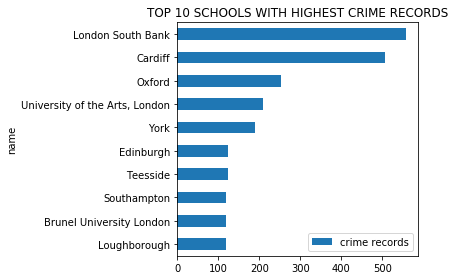

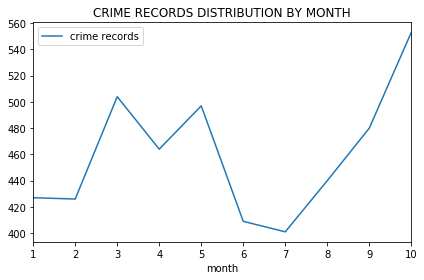

In [104]:
print("\n\n###################### CRIME RECORDS DISTRIBUTIONS ######################") 
  
sql="""select *,(drugs+"vehicle-crime"+shoplifting+burglary+robbery+"anti-social-behaviour"+"possession-of-weapons"+"public-order"+ "bicycle-theft"+
                "theft-from-the-person"+ "other-theft"+ "violent-crime"+ "criminal-damage-arson"+"other-crime") as Total from Records """
c.execute(sql)
results = c.fetchall()

for result in results:
    c.execute("""Insert into Records2 (school_id,name,month,Total) VALUES (?,?,?,?) """,(result[0],result[1],int(result[2].split('-')[1]),result[-1]))
conn.commit() 
# visulize Top 10 schools that have the most crime records
    
c.execute('DROP TABLE IF EXISTS RecordsBySchool') 
c.execute('CREATE TABLE RecordsBySchool (school_id Integer, name Text,Total Integer)')
sql='select school_id,name,sum(Total) from Records2 GROUP BY name ORDER BY sum(Total) DESC'
c.execute(sql)
results = c.fetchall()
x=[]
y=[]
for result in results:
    c.execute("""Insert into RecordsBySchool (school_id,name,Total) VALUES (?,?,?) """,(result[0],result[1],result[2]))
    x.append(result[1])
    y.append(result[2])

conn.commit()   

r=(list(results))[0:10]
r.reverse()

df=pd.DataFrame(list(r))
cols=['school_id','name','crime records']
df.columns=cols
df.plot.barh(x='name', y='crime records',title='TOP 10 SCHOOLS WITH HIGHEST CRIME RECORDS')
plt.tight_layout()




# visulize crime records' distribution by month

c.execute('DROP TABLE IF EXISTS RecordsByMonth') 
c.execute('CREATE TABLE RecordsByMonth (school_id Integer, month Integer,Total Integer)')
sql='select school_id,month,sum(Total) from Records2 GROUP BY month ORDER BY month'
c.execute(sql)
results = c.fetchall()
for result in results:
    c.execute("""Insert into RecordsByMonth (school_id,month,Total) VALUES (?,?,?) """,(result[0],result[1],result[2]))

conn.commit()   


r=list(results)
r.append(results[1])
del r[1]
#r.reverse()
df=pd.DataFrame(list(r))
cols=['school_id','month','crime records']
df.columns=cols
df.plot(x='month', y='crime records',title='CRIME RECORDS DISTRIBUTION BY MONTH')
plt.tight_layout()



In [105]:
#Get shcools' rank and location informations
c.execute("""select s.rank,s.name,c.lat,c.lng from Schools s left join Coordinates c on s.school_id=c.school_id """)
results = c.fetchall()
df=pd.DataFrame(results)
cols=["rank","name","lat","lng"]
df.columns=cols
df

,rank,name,lat,lng
0,1,Cambridge,52.205337,0.121817
1,2,Oxford,51.752021,-1.257726
2,3,St Andrews,56.339775,-2.796721
3,4,London School of Economics,51.514439,-0.116451
4,5,Imperial College London,51.498800,-0.174877
5,6,Durham,54.775250,-1.584852
6,7,Lancaster,54.046575,-2.800740
7,8,Loughborough,52.772099,-1.206166
8,9,Bath,51.381064,-2.359017
9,10,University College London,51.524559,-0.134040


Input the school name you want to query :
Cambridge


,school_id,name,month,drugs,vehicle-crime,shoplifting,burglary,robbery,anti-social-behaviour,possession-of-weapons,public-order,bicycle-theft,theft-from-the-person,other-theft,violent-crime,criminal-damage-arson,other-crime
0,0,Cambridge,2019-1,0,0,0,0,0,2,1,0,0,0,0,0,0,2
1,0,Cambridge,2019-2,0,0,0,0,0,1,0,0,2,1,0,0,0,5
2,0,Cambridge,2019-3,0,0,0,0,0,3,1,0,5,1,0,0,0,10
3,0,Cambridge,2019-4,0,0,0,0,0,0,0,0,1,3,0,0,0,11
4,0,Cambridge,2019-5,0,0,1,0,0,2,0,0,1,2,0,0,0,9
5,0,Cambridge,2019-6,0,0,1,0,0,2,0,2,1,0,1,0,0,4
6,0,Cambridge,2019-7,0,0,0,0,0,0,3,0,1,1,2,0,0,0
7,0,Cambridge,2019-8,0,0,0,1,0,0,0,0,1,1,1,0,2,4
8,0,Cambridge,2019-9,0,0,0,0,0,1,1,0,2,1,1,1,0,3
9,0,Cambridge,2019-10,0,0,0,0,0,0,1,2,2,1,1,0,0,8


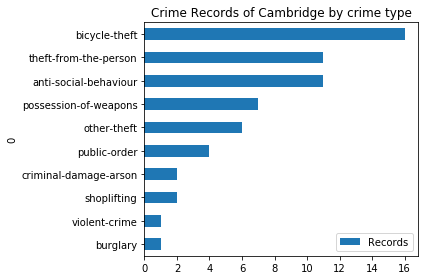

In [106]:
#Get a school's crime records, filter types that never happened in that shcool and show the crime types ordering by counts
#We use Cambridge as an example here
try:
    school=input('Input the school name you want to query :\n')
    c.execute(f"""select * from Records where name='{school}' """)
    results = c.fetchall()
except:
    print("Please input a correct name")
cols=["school_id","name","month","drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson","other-crime"]
df=pd.DataFrame(results)
df.columns=cols


dic={}
for x in cols[3:-1]:
    if df[x].sum()!=0 and x!='other-crime':
        dic[x]=df[x].sum()

a=sorted(dic.items(),key=lambda item:item[1])
a=pd.DataFrame(a)
a.plot.barh(x=0,y=1,label='Records',title='Crime Records of '+school+" by crime type")
plt.tight_layout()
df

In [107]:
#Get a specific month's crime records
#We use April as the example here
try:
    month=input('Input the month you want to query :\n')
    month='2019-'+month
    c.execute(f"""select "month",sum("drugs"),sum("vehicle-crime"),sum("shoplifting"),\
            sum("burglary"),sum("robbery"),sum("anti-social-behaviour"),\
            sum("possession-of-weapons"),sum("public-order"),sum("bicycle-theft"),\
            sum("theft-from-the-person"),sum("other-theft"),\
            sum("violent-crime"),sum("criminal-damage-arson"),sum("other-crime") \
            from Records where month='{month}' GROUP BY month""")
    results = c.fetchall()
    cols=["month","drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson","other-crime"]
    df=pd.DataFrame(results)
    df.columns=cols
    
except:
    print("Please input a correct month")
    
df

Input the month you want to query :
4


,month,drugs,vehicle-crime,shoplifting,burglary,robbery,anti-social-behaviour,possession-of-weapons,public-order,bicycle-theft,theft-from-the-person,other-theft,violent-crime,criminal-damage-arson,other-crime
0,2019-4,25,8,44,9,11,62,3,33,30,41,80,96,15,7


Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :
public-order


,month,public-order
0,2019-1,32
1,2019-2,39
2,2019-3,35
3,2019-4,33
4,2019-5,36
5,2019-6,34
6,2019-7,32
7,2019-8,41
8,2019-9,34
9,2019-10,33


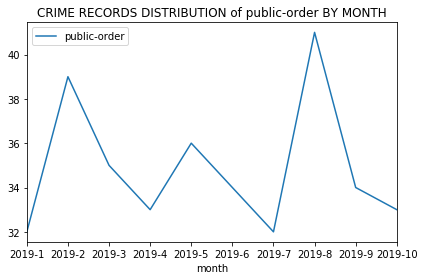

In [108]:
#Get the trend for a given type of crime in UK
#We use the type called "public-order" as an example here
try:
    crimetype=input('Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :\n')
    ct='"'+crimetype+'"'
    c.execute(f"""select month, sum({ct}) from Records Group by month""")
    results = c.fetchall()
    results=list(results)
    results.append(results[1])
    del results[1]
    cols=["month",crimetype]
    df=pd.DataFrame(results)
    df.columns=cols
    df.plot(x="month",y=crimetype,title='CRIME RECORDS DISTRIBUTION of '+crimetype+' BY MONTH')
    plt.tight_layout()


except:
    print("Please input a correct crimetype")
    
df

Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :
drugs
Please input the school you want to view:
Oxford


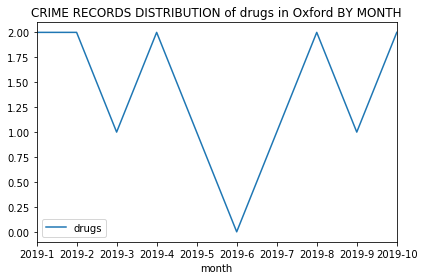

In [109]:
#Get the trend for a type of crime of a school
#we use type "drugs" of Oxford as example here

try:
    crimetype=input('Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :\n')
    ct='"'+crimetype+'"'
    schoolname=input("Please input the school you want to view:\n")
    c.execute(f"""select month, sum({ct}) from Records where name="{schoolname}" Group by month""")
    results = c.fetchall()
    results=list(results)
    results.append(results[1])
    del results[1] 
    cols=["month",crimetype]
    df=pd.DataFrame(results)
    df.columns=cols
    df.plot(x="month",y=crimetype,title='CRIME RECORDS DISTRIBUTION of '+crimetype+ ' in ' +schoolname+' BY MONTH')
    plt.tight_layout()


except:
    print("Please input a correct crimetype and school name")

In [110]:
#Check the TOP10 dangerous Schools
c.execute("""select name, Total from RecordsBySchool order by Total DESC """)
results = c.fetchall()
df=pd.DataFrame(results[0:10])
cols=["name","Total Crime Records"]
df.columns=cols
df

,name,Total Crime Records
0,London South Bank,558
1,Cardiff,506
2,Oxford,253
3,"University of the Arts, London",208
4,York,190
5,Edinburgh,125
6,Teesside,124
7,Southampton,120
8,Brunel University London,119
9,Loughborough,119


In [111]:
#Check the school without crimrecord
c.execute("""select name, Total from RecordsBySchool where Total=0 """)
results = c.fetchall()
df=pd.DataFrame(results)
cols=["name","Total Crime Records"]
df.columns=cols
df

,name,Total Crime Records
0,Edge Hill,0
1,Edinburgh Napier,0
2,Heriot-Watt,0
3,Liverpool Hope,0
4,Liverpool John Moores,0
5,Northumbria,0
6,Nottingham,0
7,Nottingham Trent,0
8,St Andrews,0
9,Staffordshire,0
